# Imports

In [161]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, tree, metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import itertools
import random
import json
import sys
import os.path



# Load data set into script

In [110]:
with open('../../../Downloads/codeforces-scraper-master/cfspider/CodeForceDataSet/processed_data.json') as data:
    jdata = json.load(data)

# Extract data

In [135]:
rows = []
index = []
for problem in jdata:
    
    for submissions in problem['Submissions']:
        for submission in submissions:
            code = submissions[submission]['Code'][0]
            rows.append({'code':code, 'label':str(problem['contestId'])+problem['index']})
            index.append(submission)

data = DataFrame(rows, index=index)

# Split data set into a validation set, training set and testing set

In [162]:
# Create separate validation data from training and testing data
seed = 56
sub_data, validate_data = train_test_split(data,test_size=0.20, random_state=seed)

# Create bag of words with all of the data not part of the validation set
vectorizer = CountVectorizer()
BoW = vectorizer.fit_transform(sub_data['code'].values)
targets = sub_data['label'].values

# create traing and testing data
seed = 42
data_train, data_test = train_test_split(sub_data,test_size=0.20, random_state=seed)
x_train = vectorizer.transform(data_train['code'].values)
y_train = data_train['label'].values
x_test = vectorizer.transform(data_test['code'].values)
y_test = data_test['label'].values

# Create Machine Learning algorithms

In [141]:

svm_classifier = svm.SVC(kernel='linear',class_weight='balanced')
dt_classifier = tree.DecisionTreeClassifier(class_weight='balanced')
rf_classifier = RandomForestClassifier(n_estimators=10,class_weight='balanced')
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,70),max_iter=500)



# Cross validate for each classifier

In [142]:
print('Random chance score: ' + str(1/len(set(targets))))
svm_scores = cross_val_score(svm_classifier, BoW, targets, cv=5)
print('SVM scores: ' + str(svm_scores))
dt_scores = cross_val_score(dt_classifier, BoW, targets, cv=5)
print('DT scores:  ' + str(dt_scores))
rf_scores = cross_val_score(rf_classifier, BoW, targets, cv=5)
print('RF scores:  ' + str(rf_scores))
nn_scores = cross_val_score(nn_classifier, BoW, targets, cv=5)
print('NN scores:  ' + str(nn_scores))

Random chance score: 0.020833333333333332
SVM scores: [0.74135091 0.75042159 0.77474403 0.73275862 0.75087719]
DT scores:  [0.71334432 0.75042159 0.77303754 0.7637931  0.74912281]
RF scores:  [0.70345964 0.73693086 0.7440273  0.74137931 0.69824561]
NN scores:  [0.74135091 0.72006745 0.76450512 0.72068966 0.70526316]


# Mean Accuracy of each classifier

In [143]:
print("Accuracy of SVM (rbf): %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
print("Accuracy of Decision Tree: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))
print("Accuracy of Random Forest: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))
print("Accuracy of Neural Network: %0.2f (+/- %0.2f)" % (nn_scores.mean(), nn_scores.std() * 2))

Accuracy of SVM (rbf): 0.75 (+/- 0.03)
Accuracy of Decision Tree: 0.75 (+/- 0.04)
Accuracy of Random Forest: 0.72 (+/- 0.04)
Accuracy of Neural Network: 0.73 (+/- 0.04)


# Train classifiers using Training data

In [144]:

svm_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)
nn_classifier.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 70), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Get scores for the classifiers using test data

In [145]:
score = svm_classifier.score(x_test, y_test)
print('SVM score: ' + str(score))
score = dt_classifier.score(x_test, y_test)
print('DT score: ' + str(score))
score = rf_classifier.score(x_test, y_test)
print('RF score: ' + str(score))
score = nn_classifier.score(x_test, y_test)
print('NN score: ' + str(score))

SVM score: 0.7278911564625851
DT score: 0.7670068027210885
RF score: 0.7312925170068028
NN score: 0.7227891156462585


# Create bag of words for validate data

In [146]:
x_validate = vectorizer.transform(validate_data['code'].values)
y_validate = validate_data['label'].values

# Get scores for the classifiers using validation data

In [147]:
score = svm_classifier.score(x_validate, y_validate)
print('SVM score: ' + str(score))
score = dt_classifier.score(x_validate, y_validate)
print('DT score: ' + str(score))
score = rf_classifier.score(x_validate, y_validate)
print('RF score: ' + str(score))
score = nn_classifier.score(x_validate, y_validate)
print('NN score: ' + str(score))

SVM score: 0.7646258503401361
DT score: 0.7578231292517007
RF score: 0.7197278911564626
NN score: 0.7333333333333333


# Create confusion matrix for each classifier

In [148]:
svm_y_pred = svm_classifier.predict(x_validate)
metrics.confusion_matrix(y_validate, svm_y_pred)

array([[ 9,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [149]:
dt_y_pred = dt_classifier.predict(x_validate)
metrics.confusion_matrix(y_validate, dt_y_pred)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 24]])

In [150]:
rf_y_pred = rf_classifier.predict(x_validate)
metrics.confusion_matrix(y_validate, rf_y_pred)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  1, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0, 21,  0],
       [ 0,  0,  0, ...,  0,  0, 24]])

In [151]:
nn_y_pred = nn_classifier.predict(x_validate)
metrics.confusion_matrix(y_validate, nn_y_pred)

array([[ 9,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0, 20,  0],
       [ 0,  0,  0, ...,  0,  0, 25]])

In [152]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(40,40))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.9        0.         0.         ... 0.         0.         0.        ]
 [0.         0.75       0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.42857143 0.         0.        ]
 [0.         0.         0.         ... 0.         0.90909091 0.        ]
 [0.         0.         0.         ... 0.         0.         0.96153846]]


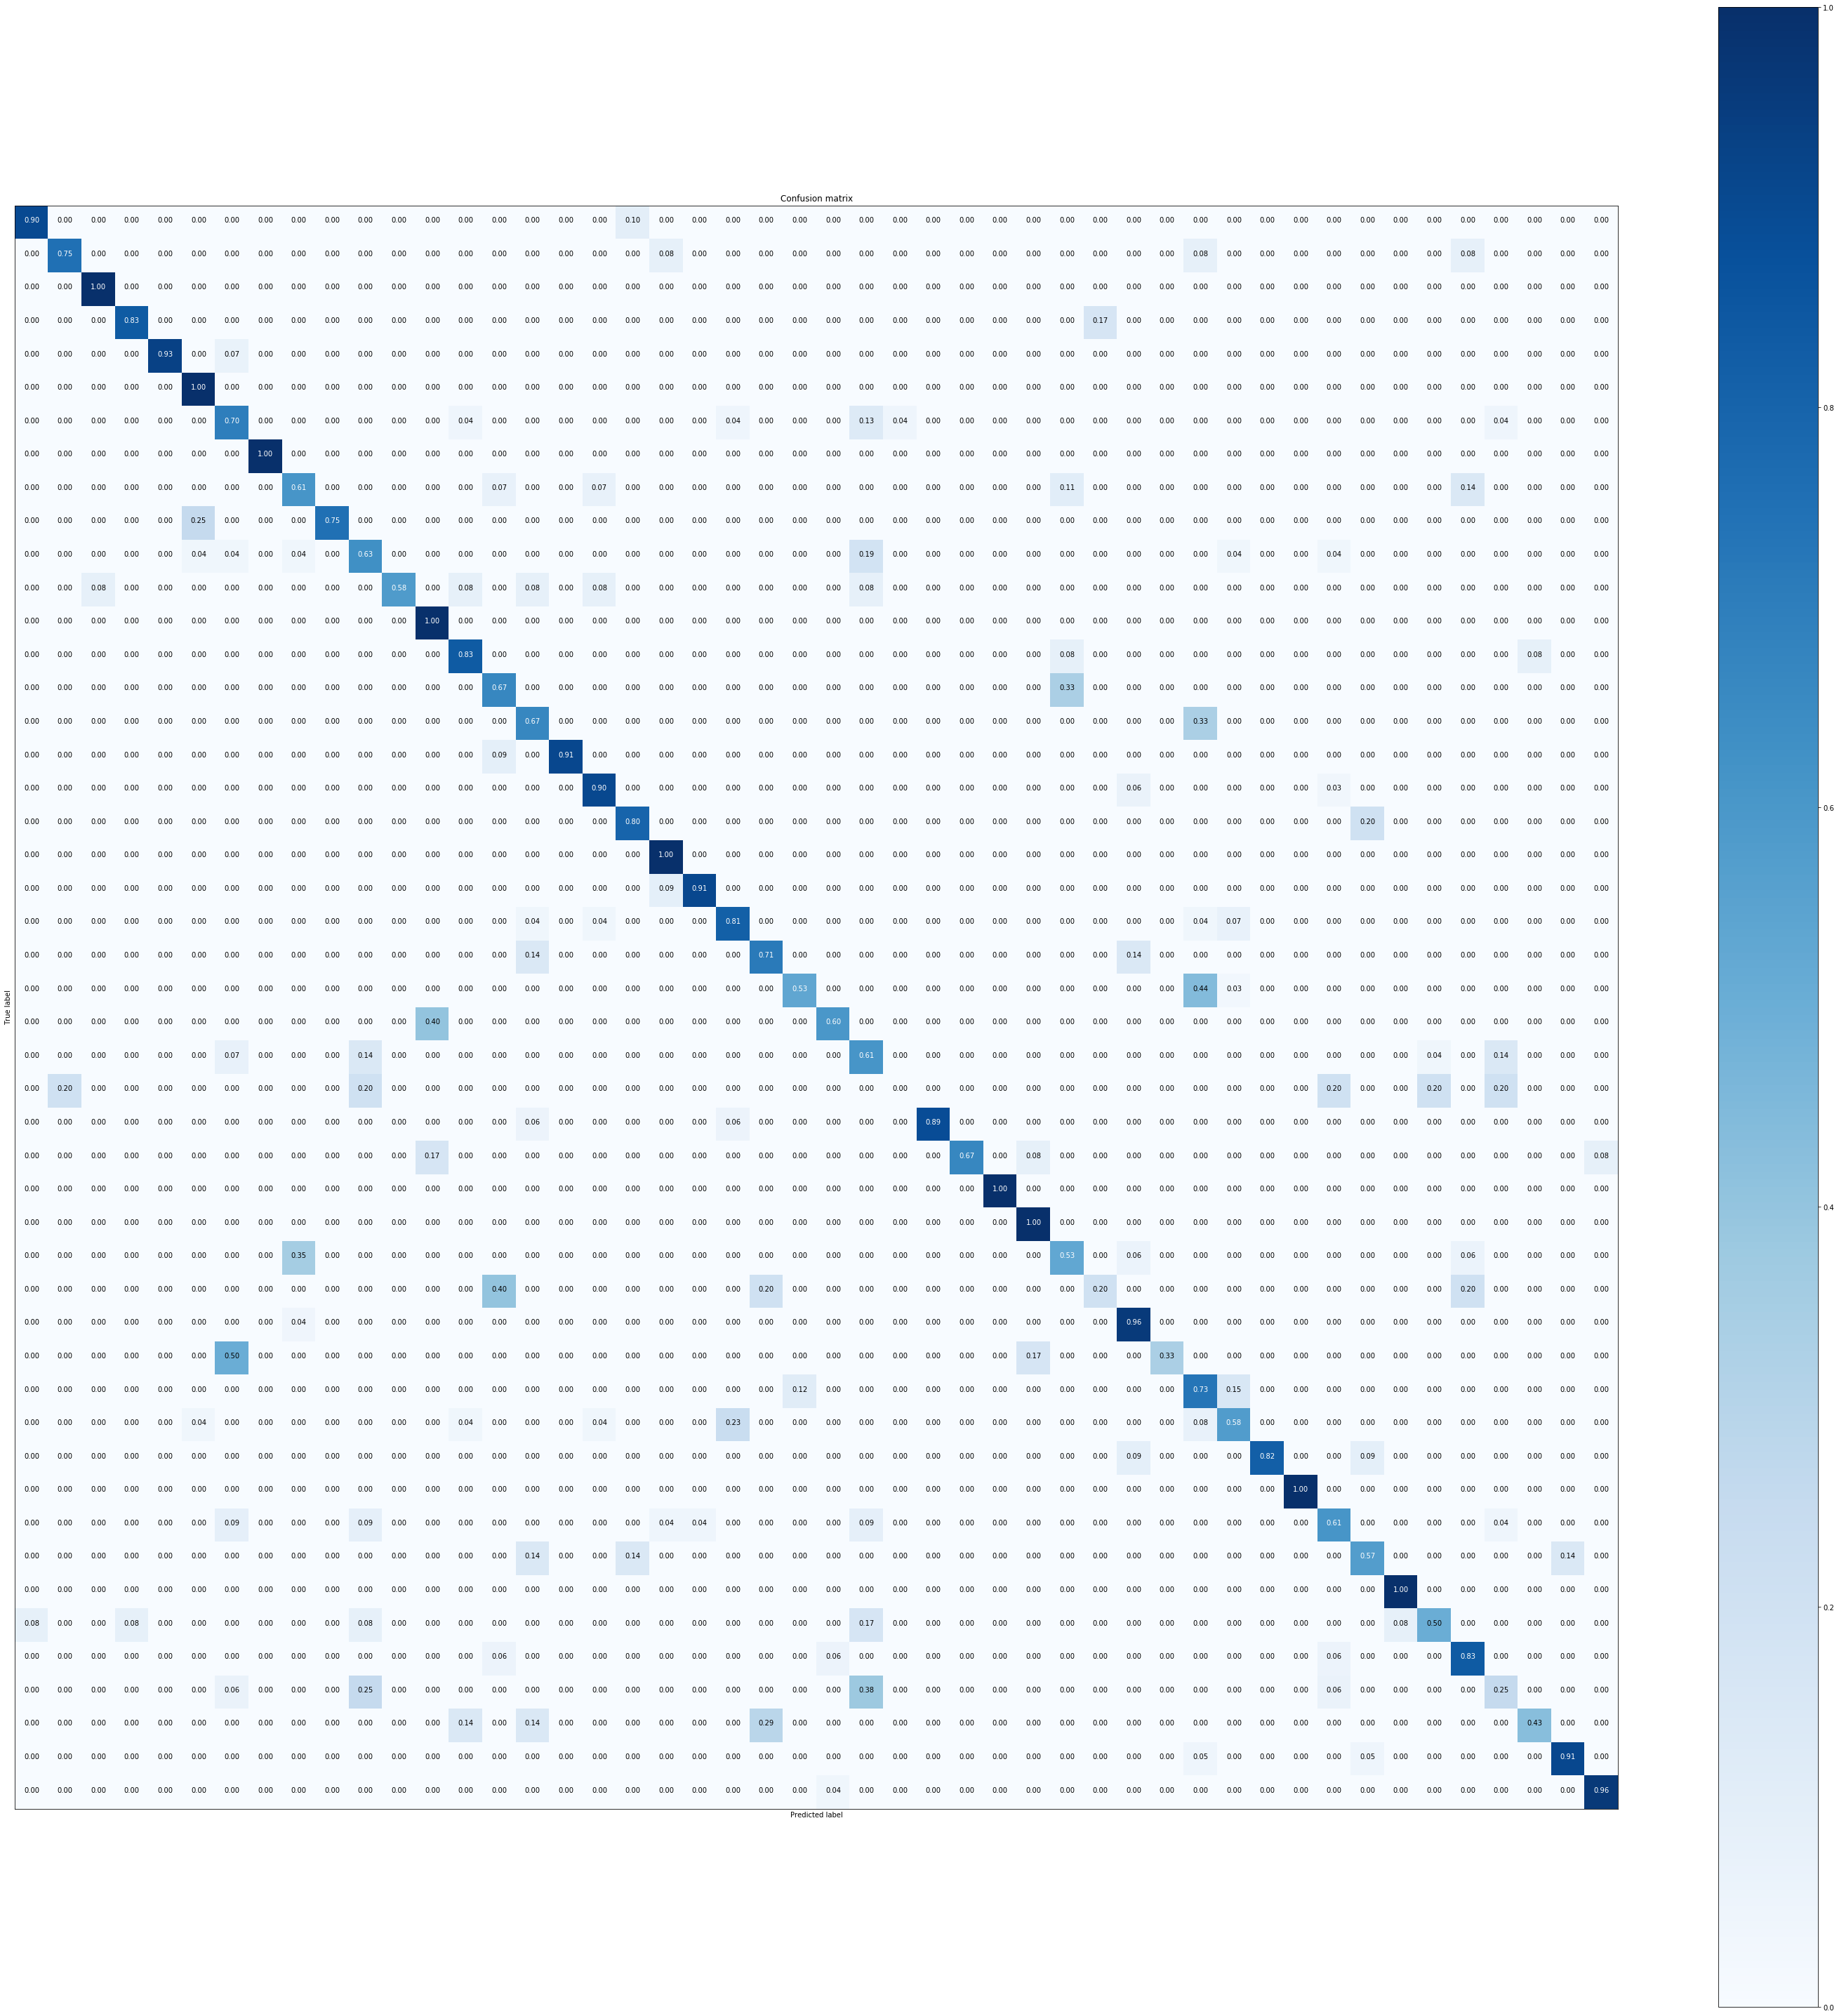

In [153]:
plot_confusion_matrix(metrics.confusion_matrix(y_validate, svm_y_pred),[],normalize=True)

Normalized confusion matrix
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.75       0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.57142857 0.         0.        ]
 [0.         0.         0.         ... 0.         0.90909091 0.        ]
 [0.         0.         0.         ... 0.         0.         0.92307692]]


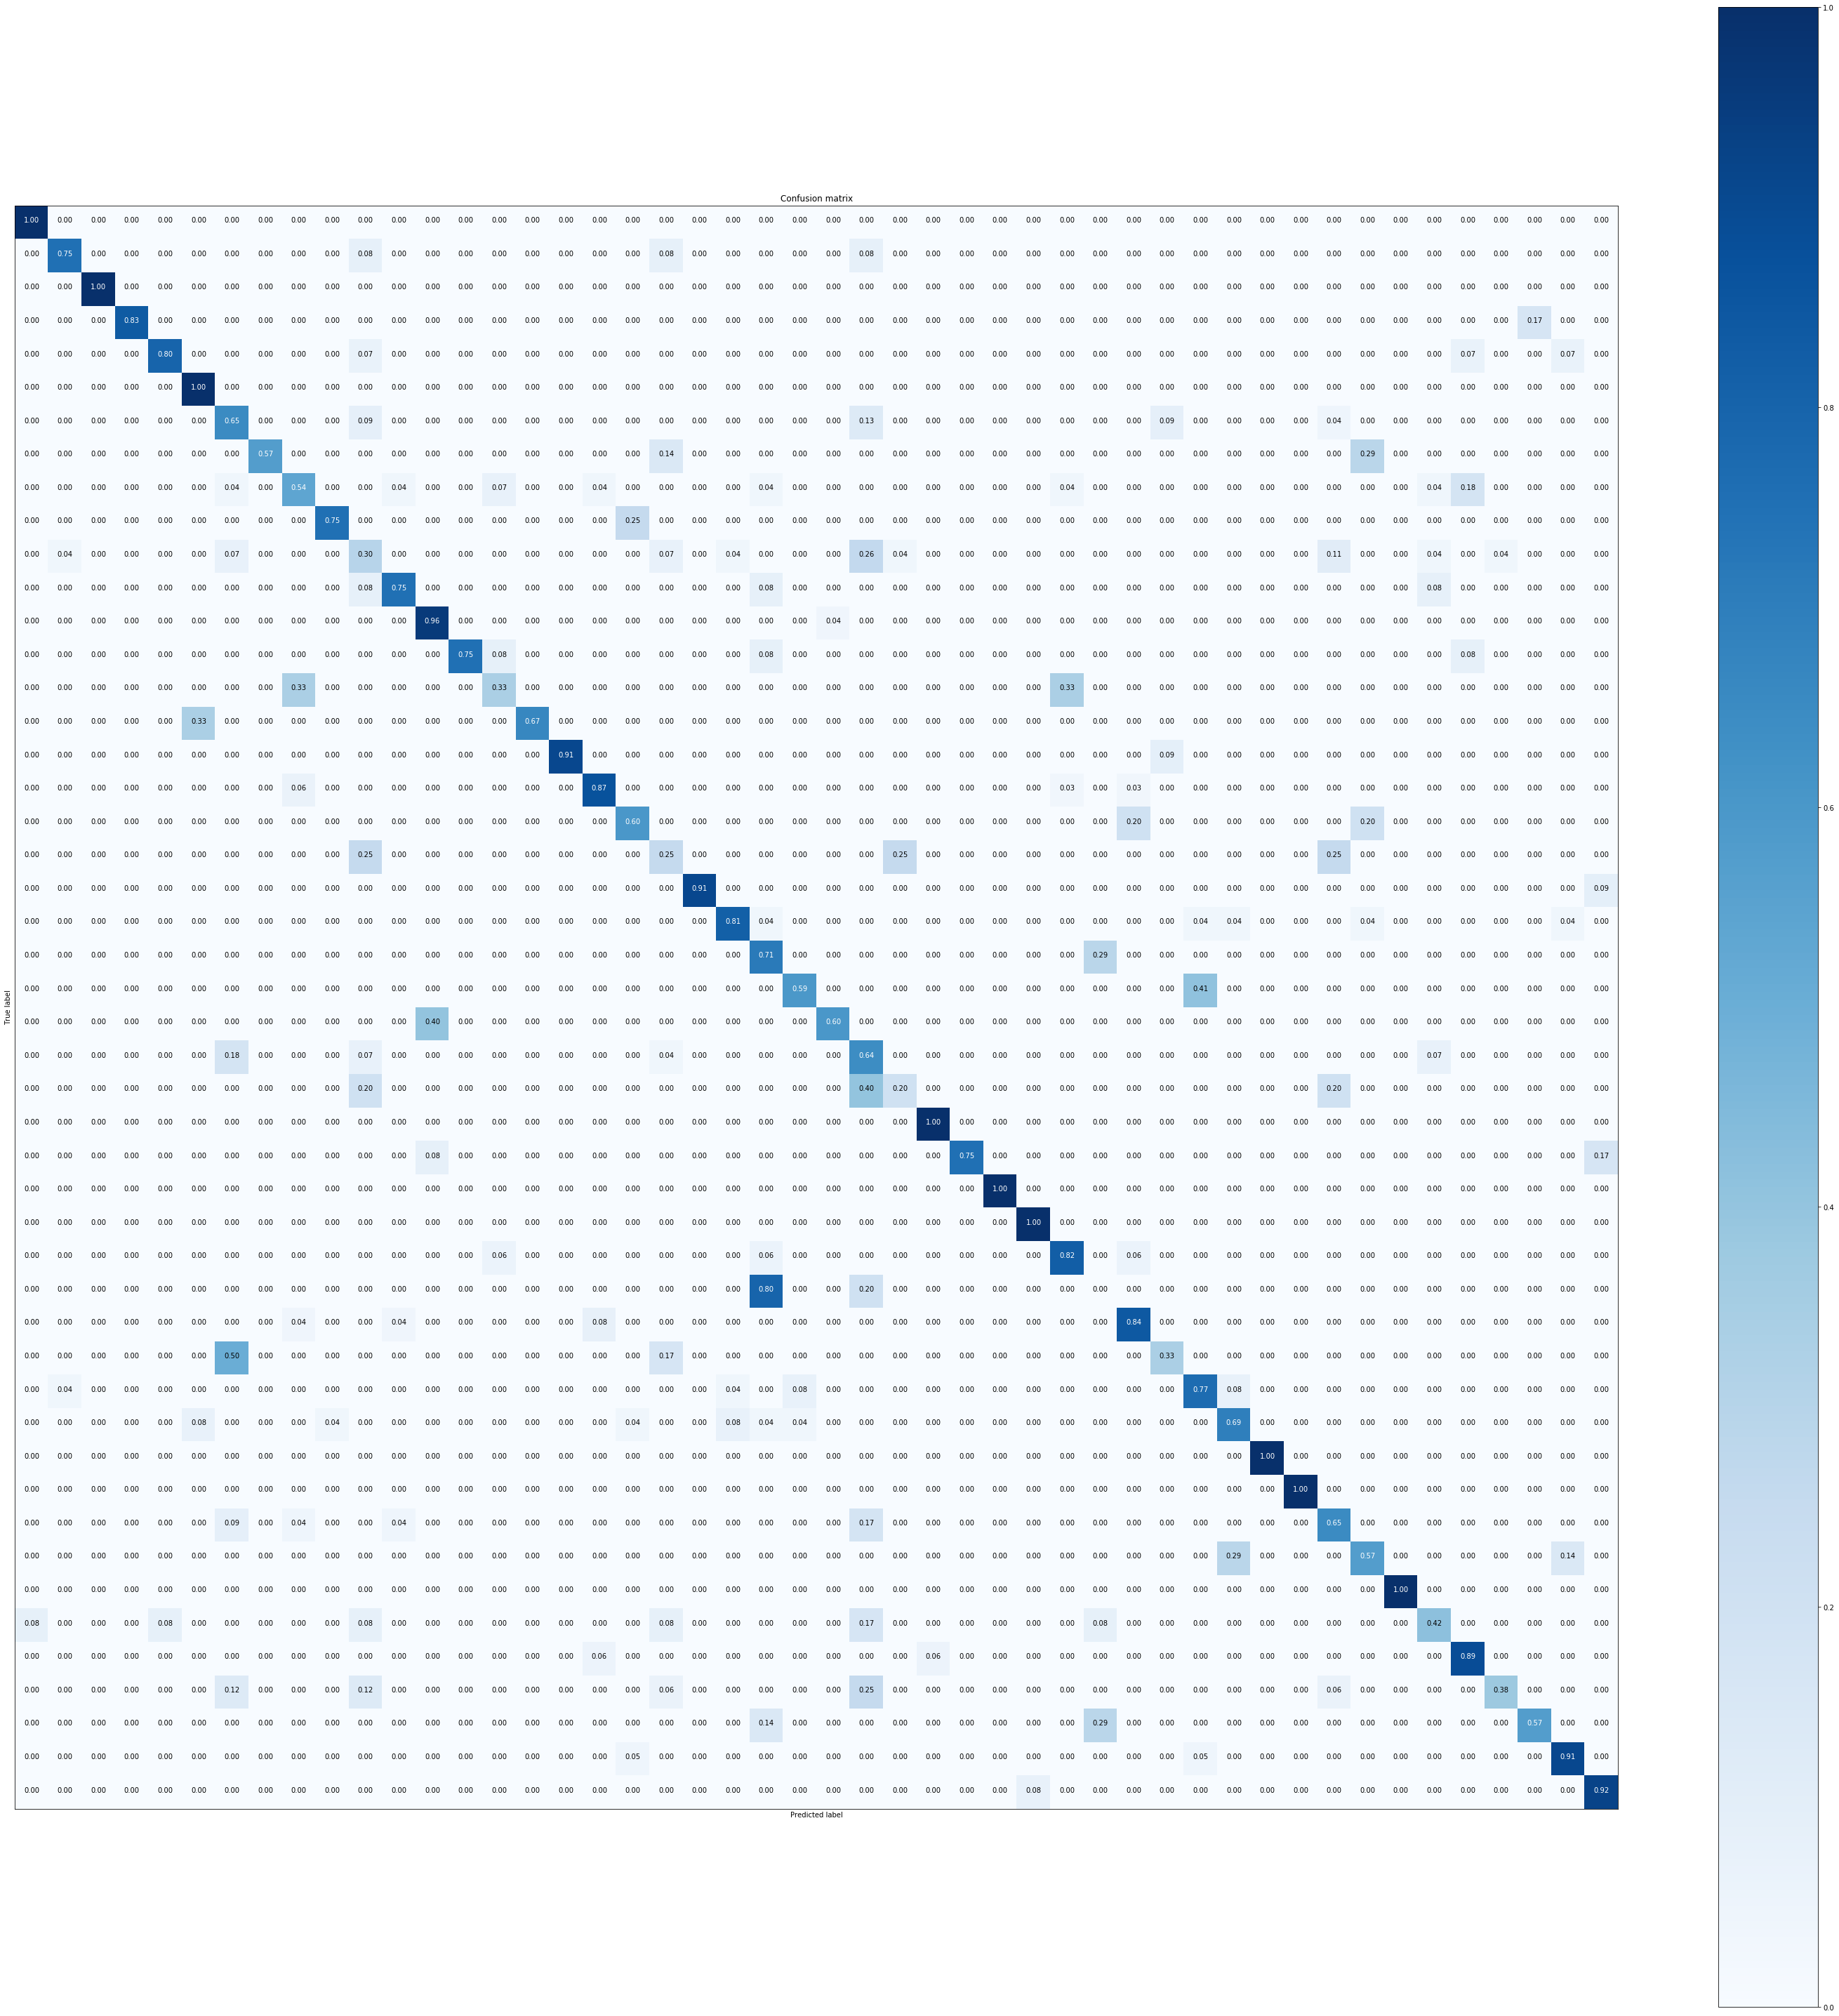

In [154]:
plot_confusion_matrix(metrics.confusion_matrix(y_validate, dt_y_pred),[],normalize=True)

Normalized confusion matrix
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.75       0.08333333 ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.28571429 0.         0.        ]
 [0.         0.         0.         ... 0.         0.95454545 0.        ]
 [0.         0.         0.         ... 0.         0.         0.92307692]]


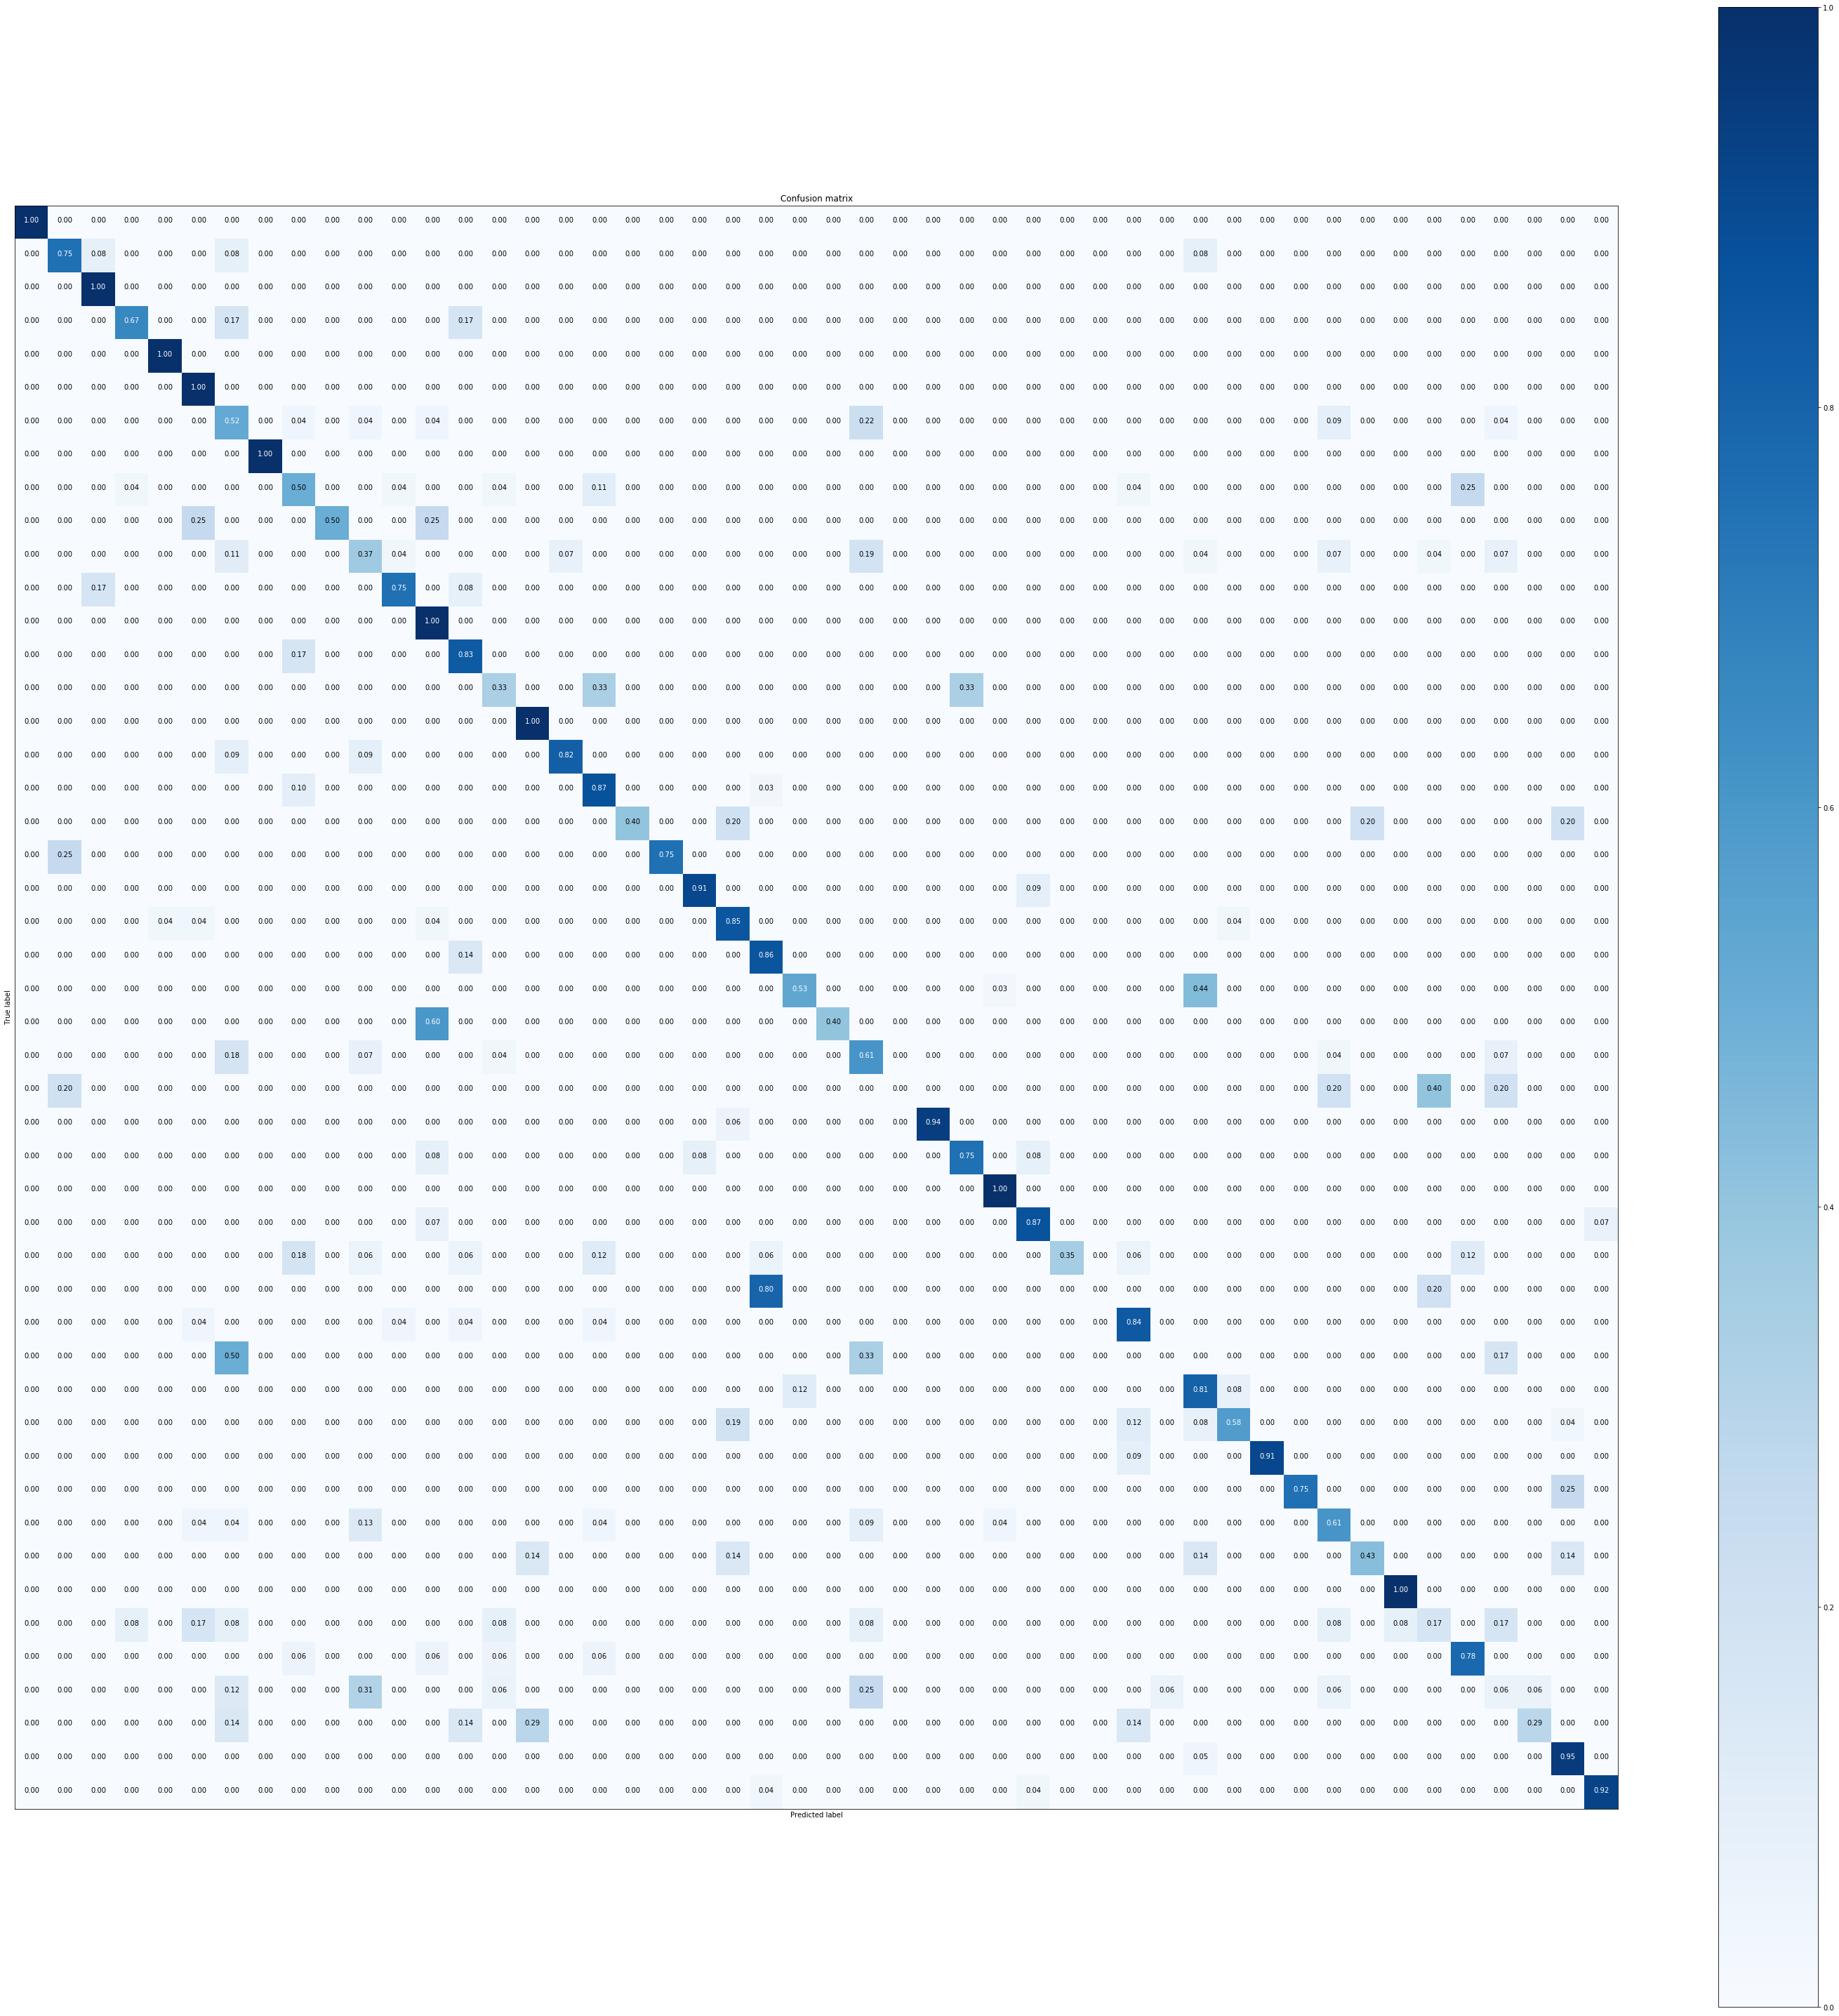

In [155]:
plot_confusion_matrix(metrics.confusion_matrix(y_validate, rf_y_pred),[],normalize=True)

Normalized confusion matrix
[[0.9        0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.71428571 0.         0.        ]
 [0.         0.         0.         ... 0.         0.90909091 0.        ]
 [0.         0.         0.         ... 0.         0.         0.96153846]]


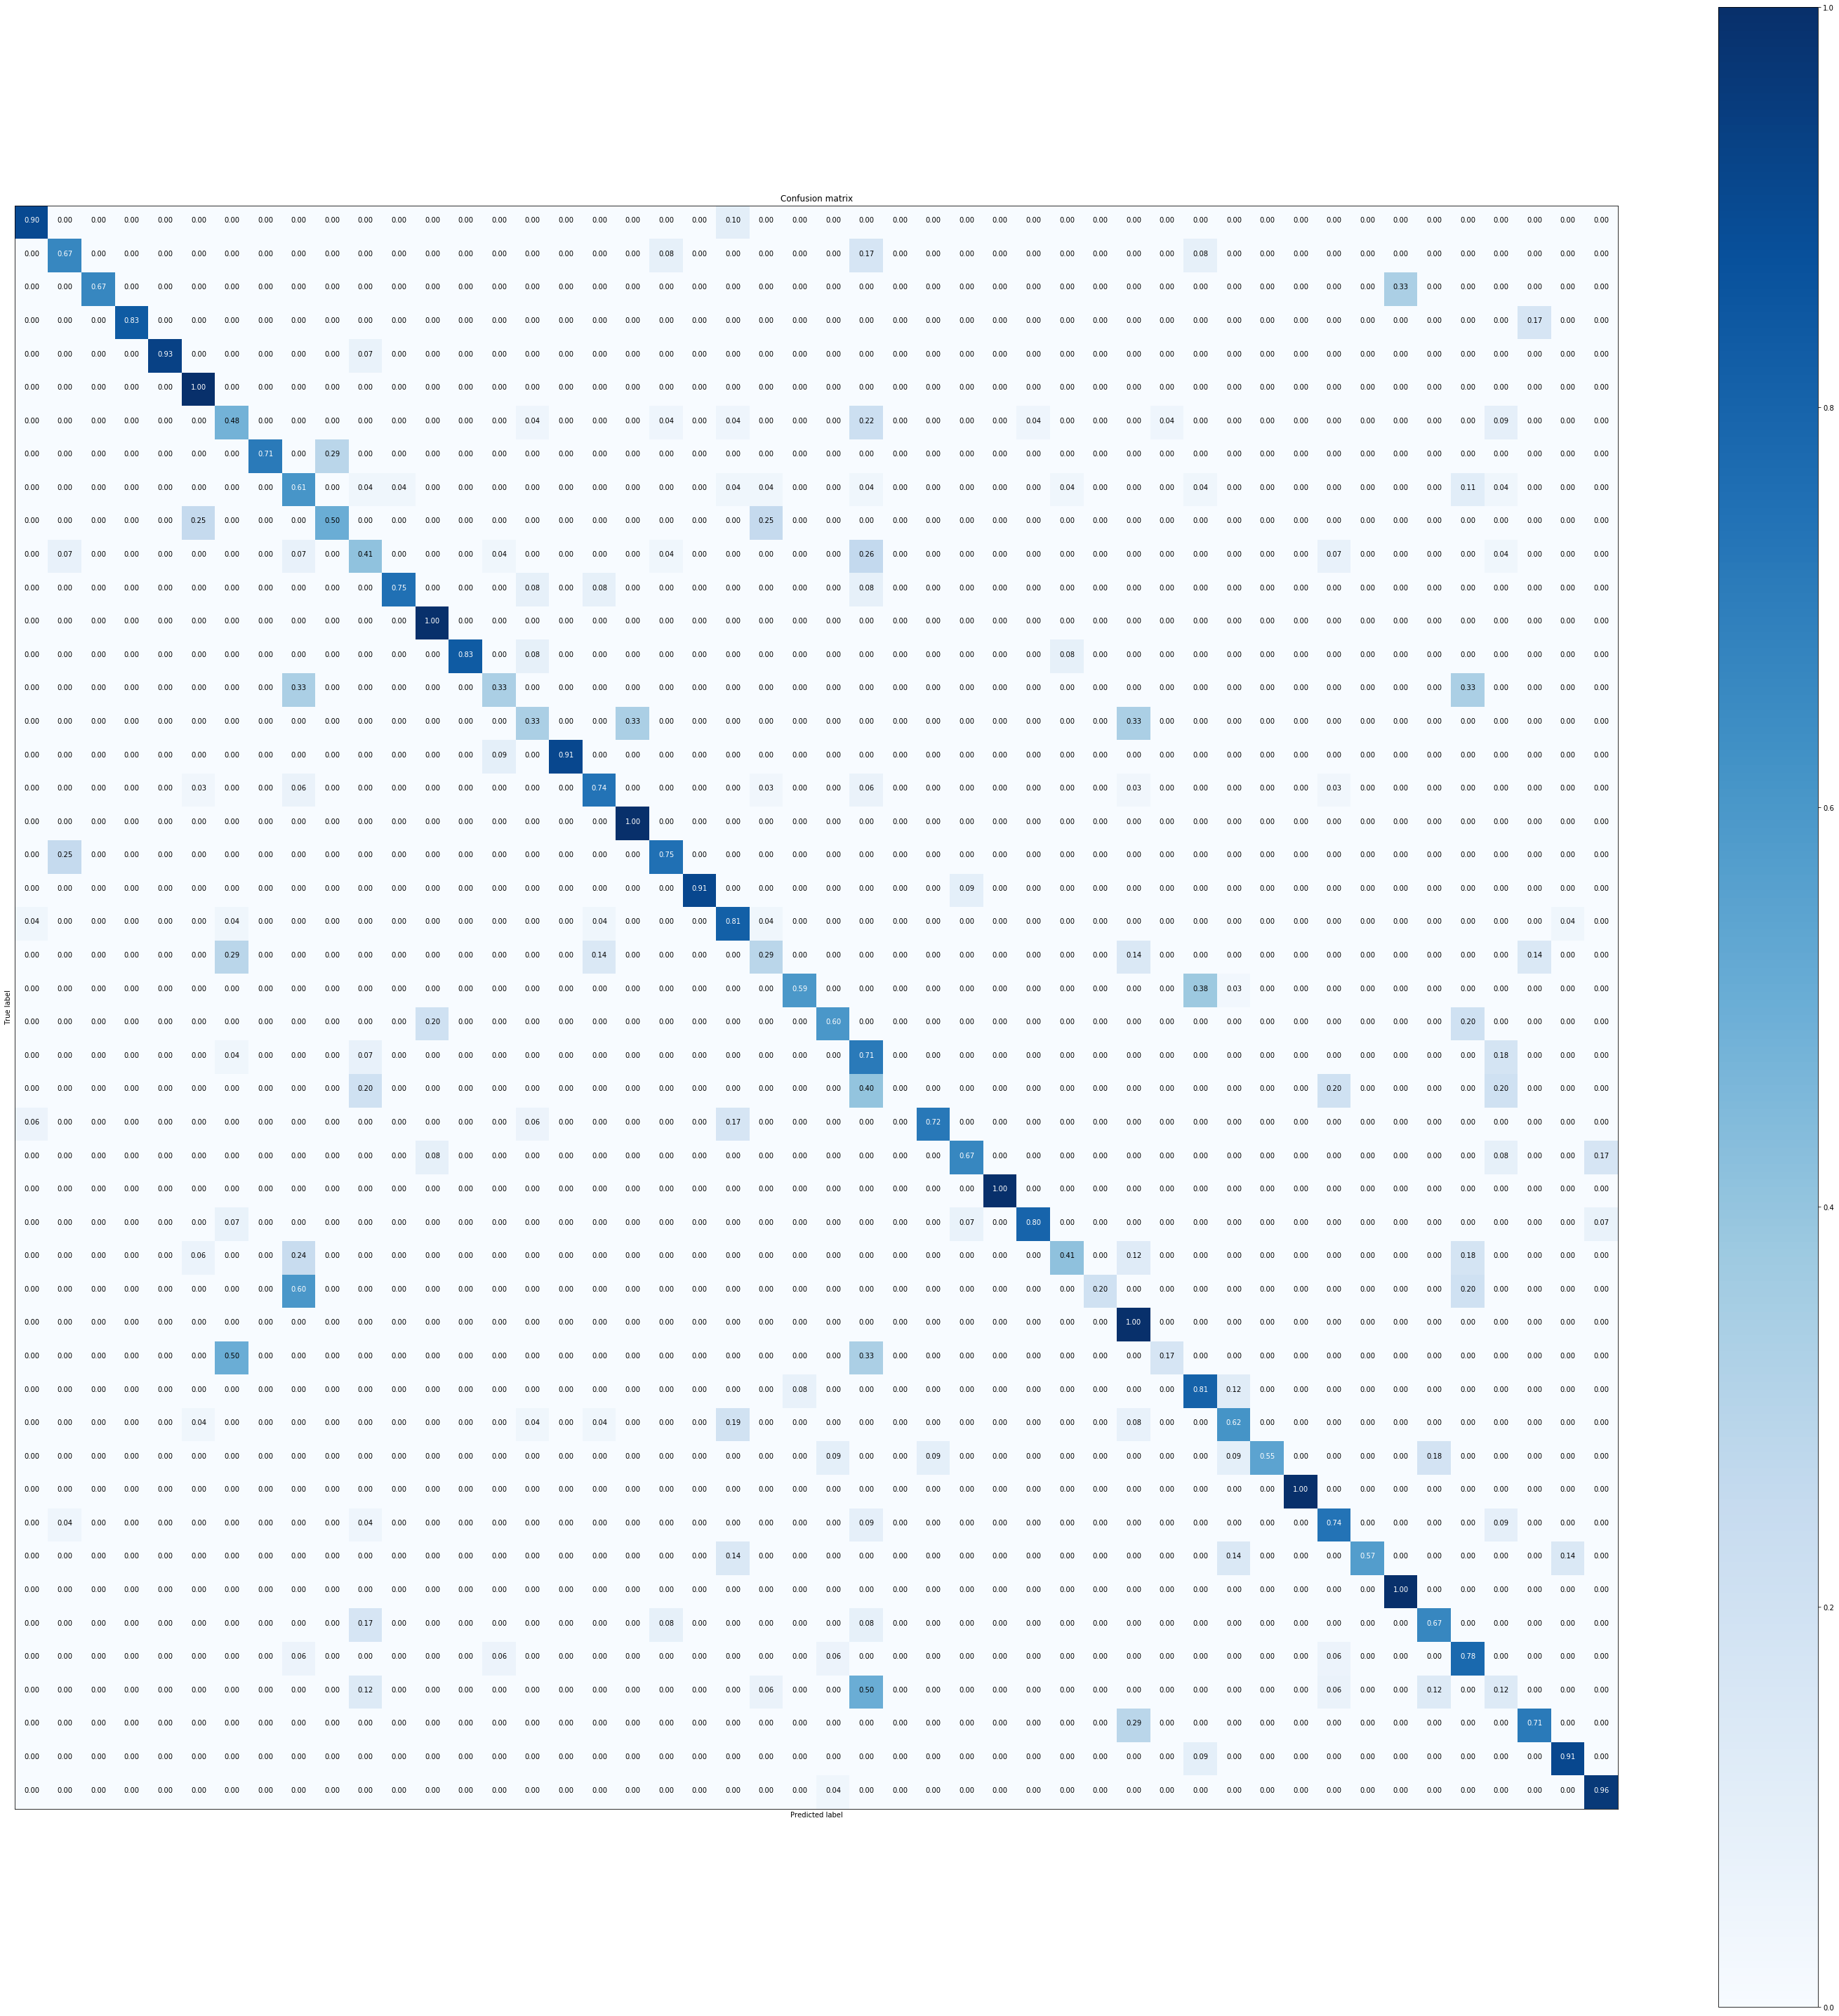

In [156]:
plot_confusion_matrix(metrics.confusion_matrix(y_validate, nn_y_pred),[],normalize=True)